In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [2]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"
new_base_url = 'https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series'

def loadData(fileName, columnName):
    data = pd.read_csv(base_url + fileName) \
             .drop(['Lat', 'Long'], axis=1) \
             .melt(id_vars=['Province/State', 'Country/Region'], var_name='date', value_name=columnName) \
             .fillna('<all>')
    data['date'] = data['date'].astype('datetime64[ns]')
    return data

In [3]:
all_data = loadData("time_series_covid19_confirmed_global.csv", "CumConfirmed") \
    .merge(loadData("time_series_covid19_deaths_global.csv", "CumDeaths")) \
    .merge(loadData("time_series_covid19_recovered_global.csv", "CumRecovered"))

In [4]:
all_data.head()

,Province/State,Country/Region,date,CumConfirmed,CumDeaths,CumRecovered
0,<all>,Afghanistan,2020-01-22,0,0,0
1,<all>,Albania,2020-01-22,0,0,0
2,<all>,Algeria,2020-01-22,0,0,0
3,<all>,Andorra,2020-01-22,0,0,0
4,<all>,Angola,2020-01-22,0,0,0


In [5]:
all_data['Province/State'].unique()

array(['<all>', 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Anhui', 'Beijing', 'Chongqing',
       'Fujian', 'Gansu', 'Guangdong', 'Guangxi', 'Guizhou', 'Hainan',
       'Hebei', 'Heilongjiang', 'Henan', 'Hong Kong', 'Hubei', 'Hunan',
       'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning',
       'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong', 'Shanghai',
       'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang', 'Yunnan',
       'Zhejiang', 'Faroe Islands', 'Greenland', 'French Guiana',
       'French Polynesia', 'Guadeloupe', 'Mayotte', 'New Caledonia',
       'Reunion', 'Saint Barthelemy', 'St Martin', 'Martinique', 'Aruba',
       'Curacao', 'Sint Maarten', 'Bermuda', 'Cayman Islands',
       'Channel Islands', 'Gibraltar', 'Isle of Man', 'Montserrat'],
      dtype=object)

In [6]:
# Opening csv with human development index
dev_index = pd.read_csv('developed_countries.csv')
dev_index.head()

,name,humanDevelopmentIndex,pop2020
0,Norway,0.953,5421.241
1,Switzerland,0.944,8654.622
2,Australia,0.939,25499.884
3,Ireland,0.938,4937.786
4,Germany,0.936,83783.942


In [7]:
# Creating and pickling population dictionary
pop_dict = dict(zip(dev_index.name, dev_index.pop2020))

with open('./pickled_files/population_dict.pkl', 'wb') as f:
    pickle.dump(pop_dict, f)
pop_dict

{'Norway': 5421.241,
 'Switzerland': 8654.622,
 'Australia': 25499.884,
 'Ireland': 4937.786,
 'Germany': 83783.942,
 'Iceland': 341.243,
 'Sweden': 10099.265,
 'Hong Kong': 7496.981,
 'Singapore': 5850.342,
 'Netherlands': 17134.872,
 'Denmark': 5792.202,
 'Canada': 37742.154,
 'United States': 331002.651,
 'United Kingdom': 67886.011,
 'Finland': 5540.72,
 'New Zealand': 4822.233,
 'Belgium': 11589.623,
 'Liechtenstein': 38.128,
 'Japan': 126476.461,
 'Austria': 9006.398,
 'Luxembourg': 625.978,
 'South Korea': 51269.185,
 'Israel': 8655.535,
 'France': 65273.511,
 'Slovenia': 2078.938,
 'Spain': 46754.778,
 'Czech Republic': 10708.981,
 'Italy': 60461.826,
 'Malta': 441.543,
 'Estonia': 1326.535,
 'Greece': 10423.054,
 'Cyprus': 1207.359,
 'Poland': 37846.611,
 'United Arab Emirates': 9890.402,
 'Lithuania': 2722.289,
 'Andorra': 77.265,
 'Qatar': 2881.053,
 'Slovakia': 5459.642,
 'Brunei': 437.479,
 'Saudi Arabia': 34813.871,
 'Portugal': 10196.709,
 'Latvia': 1886.198,
 'Bahrain':

In [8]:
# Creating and pickling index dictionary
index_dict = dict(zip(dev_index.name, dev_index.humanDevelopmentIndex))
with open('./pickled_files/dev_index_dict.pkl',  'wb') as f:
    pickle.dump(index_dict, f)
index_dict

{'Norway': 0.953,
 'Switzerland': 0.944,
 'Australia': 0.939,
 'Ireland': 0.938,
 'Germany': 0.936,
 'Iceland': 0.935,
 'Sweden': 0.933,
 'Hong Kong': 0.933,
 'Singapore': 0.932,
 'Netherlands': 0.931,
 'Denmark': 0.929,
 'Canada': 0.926,
 'United States': 0.924,
 'United Kingdom': 0.922,
 'Finland': 0.92,
 'New Zealand': 0.917,
 'Belgium': 0.916,
 'Liechtenstein': 0.916,
 'Japan': 0.909,
 'Austria': 0.908,
 'Luxembourg': 0.904,
 'South Korea': 0.903,
 'Israel': 0.903,
 'France': 0.901,
 'Slovenia': 0.896,
 'Spain': 0.891,
 'Czech Republic': 0.888,
 'Italy': 0.88,
 'Malta': 0.878,
 'Estonia': 0.871,
 'Greece': 0.87,
 'Cyprus': 0.869,
 'Poland': 0.865,
 'United Arab Emirates': 0.863,
 'Lithuania': 0.858,
 'Andorra': 0.858,
 'Qatar': 0.856,
 'Slovakia': 0.855,
 'Brunei': 0.853,
 'Saudi Arabia': 0.853,
 'Portugal': 0.847,
 'Latvia': 0.847,
 'Bahrain': 0.846,
 'Chile': 0.843,
 'Hungary': 0.838,
 'Croatia': 0.831,
 'Argentina': 0.825,
 'Oman': 0.821,
 'Russia': 0.816,
 'Montenegro': 0.814,


In [9]:
all_data.head()

,Province/State,Country/Region,date,CumConfirmed,CumDeaths,CumRecovered
0,<all>,Afghanistan,2020-01-22,0,0,0
1,<all>,Albania,2020-01-22,0,0,0
2,<all>,Algeria,2020-01-22,0,0,0
3,<all>,Andorra,2020-01-22,0,0,0
4,<all>,Angola,2020-01-22,0,0,0


In [10]:
all_data.dtypes

Province/State            object
Country/Region            object
date              datetime64[ns]
CumConfirmed               int64
CumDeaths                  int64
CumRecovered               int64
dtype: object

In [11]:
# def to_float(series):
#     series.astype(float)
#     return series

In [12]:
grouped_country = all_data.groupby('Country/Region').max().reset_index()
grouped_country.head()

,Country/Region,Province/State,date,CumConfirmed,CumDeaths,CumRecovered
0,Afghanistan,<all>,2020-03-25,84,2,2
1,Albania,<all>,2020-03-25,146,5,17
2,Algeria,<all>,2020-03-25,302,21,65
3,Andorra,<all>,2020-03-25,188,1,1
4,Angola,<all>,2020-03-25,3,0,0


In [13]:
# Grouping data by country
grouped_country.drop('Province/State', axis=1, inplace=True)
total_confirmed = grouped_country['CumConfirmed'].sum()
total_deaths = grouped_country['CumDeaths'].sum()
print(total_confirmed)
print(total_deaths)

total_deaths = '{:,.2f}'.format(total_deaths)

448580
21031


In [14]:
print(total_deaths)

21,031.00


In [15]:
grouped_country.head()


,Country/Region,date,CumConfirmed,CumDeaths,CumRecovered
0,Afghanistan,2020-03-25,84,2,2
1,Albania,2020-03-25,146,5,17
2,Algeria,2020-03-25,302,21,65
3,Andorra,2020-03-25,188,1,1
4,Angola,2020-03-25,3,0,0


In [16]:
grouped_country['dev_index'] = grouped_country['Country/Region'].map(index_dict)
grouped_country['population'] = grouped_country['Country/Region'].map(pop_dict)
grouped_country.set_index('Country/Region', inplace=True)
grouped_country.head()

,date,CumConfirmed,CumDeaths,CumRecovered,dev_index,population
Country/Region,,,,,,
Afghanistan,2020-03-25,84,2,2,0.498,38928.346
Albania,2020-03-25,146,5,17,0.785,2877.797
Algeria,2020-03-25,302,21,65,0.754,43851.044
Andorra,2020-03-25,188,1,1,0.858,77.265
Angola,2020-03-25,3,0,0,0.581,32866.272


In [17]:
# Checking for missing values
grouped_country[grouped_country['dev_index'].isna()]

,date,CumConfirmed,CumDeaths,CumRecovered,dev_index,population
Country/Region,,,,,,
Cabo Verde,2020-03-25,4,1,0,NaN,NaN
Congo (Brazzaville),2020-03-25,4,0,0,NaN,NaN
Congo (Kinshasa),2020-03-25,48,2,0,NaN,NaN
Cote d'Ivoire,2020-03-25,80,0,3,NaN,NaN
Czechia,2020-03-25,1654,6,10,NaN,NaN
Diamond Princess,2020-03-25,712,10,587,NaN,NaN
Eswatini,2020-03-25,4,0,0,NaN,NaN
Holy See,2020-03-25,4,0,0,NaN,NaN
"Korea, South",2020-03-25,9137,126,3730,NaN,NaN


In [18]:
grouped_country.loc['US']

date            2020-03-25 00:00:00
CumConfirmed                  65778
CumDeaths                       942
CumRecovered                    361
dev_index                       NaN
population                      NaN
Name: US, dtype: object

In [19]:
# Adding missing values

grouped_country.loc['US', 'dev_index'] = 0.924
grouped_country.loc['Korea, South', 'dev_index'] = 0.903
grouped_country.loc['US', 'population'] = 331002.651
grouped_country.loc['Korea, South', 'population'] = 51269.185

grouped_country

,date,CumConfirmed,CumDeaths,CumRecovered,dev_index,population
Country/Region,,,,,,
Afghanistan,2020-03-25,84,2,2,0.498,38928.346
Albania,2020-03-25,146,5,17,0.785,2877.797
Algeria,2020-03-25,302,21,65,0.754,43851.044
Andorra,2020-03-25,188,1,1,0.858,77.265
Angola,2020-03-25,3,0,0,0.581,32866.272
...,...,...,...,...,...,...
Venezuela,2020-03-25,91,0,15,0.761,28435.940
Vietnam,2020-03-25,141,0,17,0.694,97338.579
West Bank and Gaza,2020-03-25,59,0,17,NaN,NaN


In [20]:
grouped_country['DeathRate'] = (grouped_country.CumDeaths/grouped_country.CumConfirmed)*100
grouped_country.head()

,date,CumConfirmed,CumDeaths,CumRecovered,dev_index,population,DeathRate
Country/Region,,,,,,,
Afghanistan,2020-03-25,84,2,2,0.498,38928.346,2.380952
Albania,2020-03-25,146,5,17,0.785,2877.797,3.424658
Algeria,2020-03-25,302,21,65,0.754,43851.044,6.953642
Andorra,2020-03-25,188,1,1,0.858,77.265,0.531915
Angola,2020-03-25,3,0,0,0.581,32866.272,0.000000


In [21]:
# sort df by Count column
grouped_country = grouped_country.sort_values(['DeathRate'], ascending=False)
grouped_country.head()

,date,CumConfirmed,CumDeaths,CumRecovered,dev_index,population,DeathRate
Country/Region,,,,,,,
Zimbabwe,2020-03-25,3,1,0,0.535,14862.924,33.333333
Sudan,2020-03-25,3,1,0,0.502,43849.260,33.333333
Gambia,2020-03-25,3,1,0,0.460,2416.668,33.333333
Cabo Verde,2020-03-25,4,1,0,NaN,NaN,25.000000
Gabon,2020-03-25,6,1,0,0.702,2225.734,16.666667


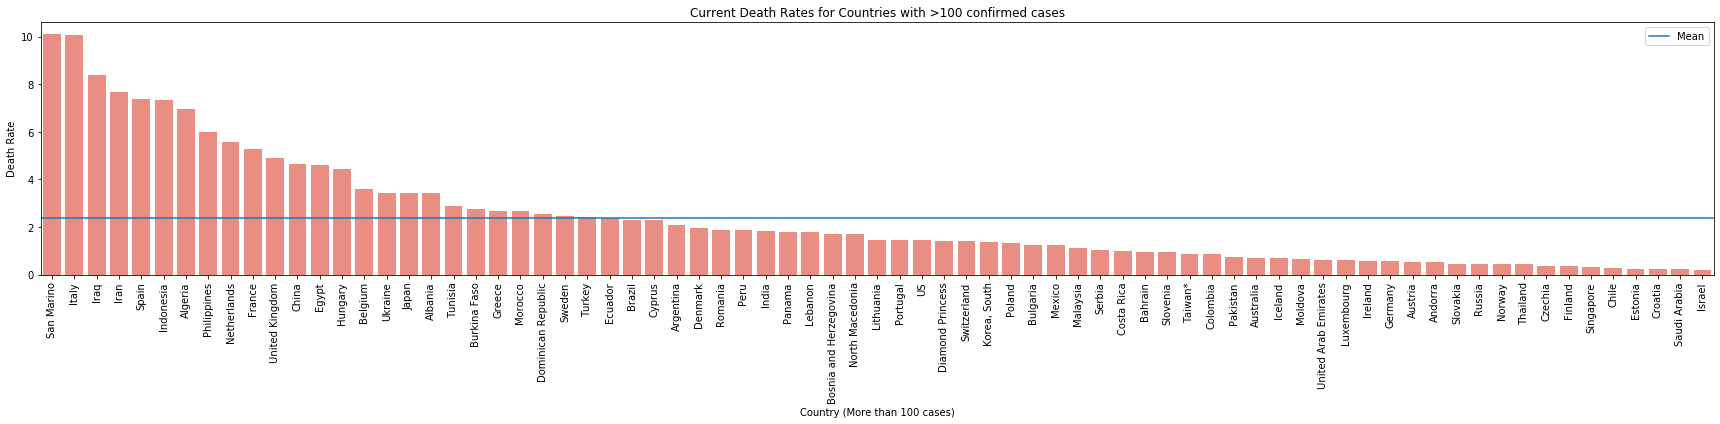

In [22]:
greater_one = grouped_country[grouped_country['DeathRate'] > 0]

more_than_100 = greater_one[greater_one.CumConfirmed > 100]

mean = more_than_100.DeathRate.mean()


fig, ax = plt.subplots(figsize=(24, 6))
ax = sns.barplot(x=more_than_100.index, y=more_than_100.DeathRate, data=more_than_100, color="salmon")
ax.axhline(mean, label='Mean')
ax.set_title('Current Death Rates for Countries with >100 confirmed cases')
plt.xticks(rotation=90)
ax.set(xlabel='Country (More than 100 cases)', ylabel='Death Rate')
plt.tight_layout()
plt.legend()
plt.savefig('current_death_rates.png', dpi=600)

In [23]:
more_than_100.head()

,date,CumConfirmed,CumDeaths,CumRecovered,dev_index,population,DeathRate
Country/Region,,,,,,,
San Marino,2020-03-25,208,21,4,NaN,NaN,10.096154
Italy,2020-03-25,74386,7503,9362,0.880,60461.826,10.086575
Iraq,2020-03-25,346,29,103,0.685,40222.493,8.381503
Iran,2020-03-25,27017,2077,9625,0.798,83992.949,7.687752
Spain,2020-03-25,49515,3647,5367,0.891,46754.778,7.365445


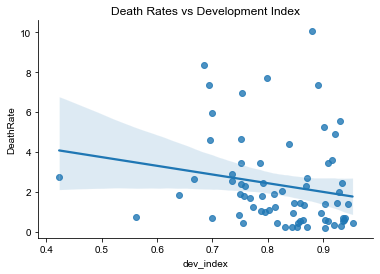

In [24]:
fix, ax = plt.subplots()


sns.set_style('dark')
size = dev_index.pop2020
ax = sns.regplot(x="dev_index", y="DeathRate", data=more_than_100)
ax.set_title('Death Rates vs Development Index')
sns.despine()
plt.savefig('death_rate_v_dev_index.png', dpi=600)

/Users/rogerlefort/anaconda3/envs/corona/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


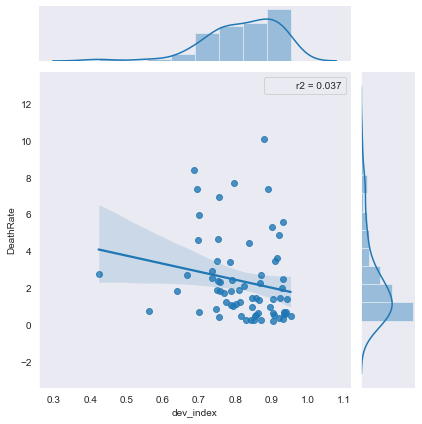

In [25]:
from scipy import stats

x = more_than_100.dev_index
y = more_than_100.DeathRate

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2)
plt.savefig('death_rate_v_dev_index_pearson.png', dpi=600)


# ax = sns.jointplot("total_bill", "tip", data=tips,
# #                   kind="reg", truncate=False,
# #                   xlim=(0, 60), ylim=(0, 12),
# #                   color="m", height=7)

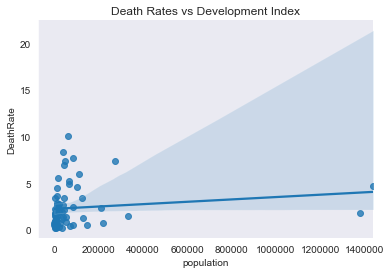

In [26]:
fix, ax = plt.subplots()


sns.set_style('dark')
size = dev_index.pop2020
ax = sns.regplot(x="population", y="DeathRate", data=more_than_100)
ax.set_title('Death Rates vs Development Index')
sns.despine()
plt.savefig('death_rate_v_population.png', dpi=600)

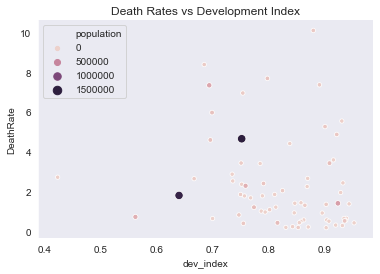

In [27]:
fix, ax = plt.subplots()

sns.set_style('dark')
#size = dev_index['pop2020']
ax = sns.scatterplot(x="dev_index", y="DeathRate", data=more_than_100, size='population', hue="population")
ax.set_title('Death Rates vs Development Index')
sns.despine()
plt.savefig('death_rate_v_dev_index_2.png', dpi=600)

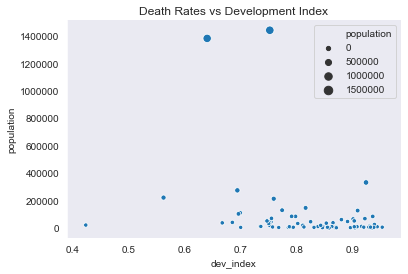

In [28]:
fix, ax = plt.subplots()

sns.set_style('dark')
#size = dev_index['pop2020']
ax = sns.scatterplot(x="dev_index", y="population", data=more_than_100, size='population')
ax.set_title('Death Rates vs Development Index')
sns.despine()
plt.savefig('pop_v_dev_index.png', dpi=600)

In [29]:
last_updated = grouped_country.date.iloc[-1]